<a href="https://colab.research.google.com/github/Md-jaber-hossain/Deep-learning-based-approach-for-recognition-and-classification-of-papaya-leaf-diseases/blob/main/VGG_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D # GlobalAveragePooling2D my edit
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import seaborn as sn
import tensorflow as tf


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Re-size all the images
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/papaya-leaf-disease-dataset/train'
test_path = '/content/drive/MyDrive/papaya-leaf-disease-dataset/test'
valid_path = '/content/drive/MyDrive/papaya-leaf-disease-dataset/validation'

print ('train class size: ', len(train_path))
print ('test class size: ', len(test_path))
print ('valid class size: ', len(valid_path))

train class size:  56
test class size:  55
valid class size:  61


In [ ]:
# Number of output classes
folders = glob('/content/drive/MyDrive/papaya-leaf-disease-dataset/train/*')
print ('total class: ', len(folders))

total class:  5


In [ ]:
# Import the Vgg 19 library

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

x = vgg.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# Create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# View the VGG-19 structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(shear_range = 0.2,
                                   rescale = 1./255,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split = 0.4 )


In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5503 images belonging to 5 classes.


In [ ]:
valid_set = train_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 651 images belonging to 5 classes.


In [ ]:
test_set = train_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical')

Found 350 images belonging to 5 classes.


In [ ]:
x,y = test_set.next()
x.shape

(1, 224, 224, 3)

In [ ]:
# Fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

Epoch 1/20
172/172 [==============================] - 1609s 9s/step - loss: 0.5375 - accuracy: 0.8172 - val_loss: 0.2513 - val_accuracy: 0.9048
Epoch 2/20
172/172 [==============================] - 142s 828ms/step - loss: 0.1644 - accuracy: 0.9591 - val_loss: 0.1112 - val_accuracy: 1.0000
Epoch 3/20
172/172 [==============================] - 139s 806ms/step - loss: 0.0814 - accuracy: 0.9807 - val_loss: 0.0658 - val_accuracy: 1.0000
Epoch 4/20
172/172 [==============================] - 139s 806ms/step - loss: 0.0544 - accuracy: 0.9871 - val_loss: 0.3188 - val_accuracy: 0.8571
Epoch 5/20
172/172 [==============================] - 139s 804ms/step - loss: 0.0307 - accuracy: 0.9947 - val_loss: 0.2208 - val_accuracy: 0.9524
Epoch 6/20
172/172 [==============================] - 139s 807ms/step - loss: 0.0209 - accuracy: 0.9973 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 7/20
172/172 [==============================] - 137s 795ms/step - loss: 0.0151 - accuracy: 0.9987 - val_loss: 0.2116 - v

In [ ]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)
print('\nTest accuracy:', test_acc)

350/350 - 47s - loss: 0.3007 - accuracy: 0.9686 - 47s/epoch - 134ms/step

Test accuracy: 0.9685714244842529


In [ ]:
print('\nTest loss:', test_loss)


Test loss: 0.3007338047027588


In [ ]:
model.save('/content/drive/MyDrive/papaya-leaf-disease-dataset/papaya-leaf-vgg19.h5')

In [ ]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)
print('\nTest accuracy:', test_acc)

350/350 - 12s - loss: 0.2593 - accuracy: 0.9629 - 12s/epoch - 34ms/step

Test accuracy: 0.9628571271896362


In [ ]:
nb_samples = len(test_set)
print(nb_samples)

350


1/1 [==============================] - 0s 21ms/step


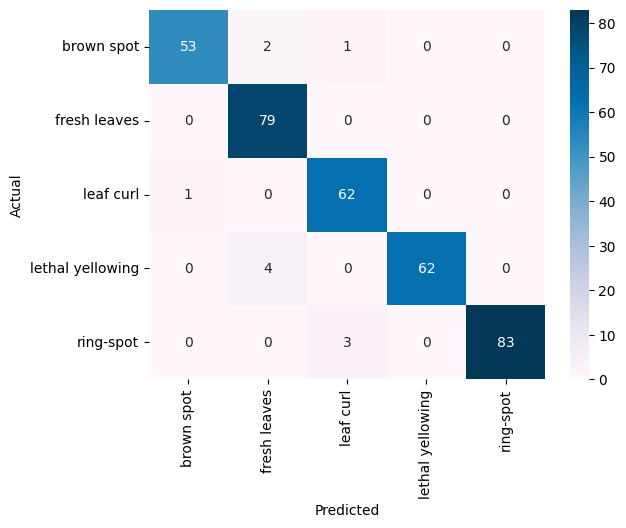

test accuracy : 96.85714285714285


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/papaya-leaf-disease-dataset/papaya-leaf-vgg19.h5')
filenames = test_set.filenames
y_prob=[]
y_act=[]
test_set.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_set.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='PuBu', annot=True,fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [ ]:
from sklearn.metrics import classification_report
class_label=list(test_set.class_indices.keys())
print(classification_report(actual_class, predicted_class,target_names=class_label))

                  precision    recall  f1-score   support

      brown spot       0.98      0.95      0.96        56
    fresh leaves       0.93      1.00      0.96        79
       leaf curl       0.94      0.98      0.96        63
lethal yellowing       1.00      0.94      0.97        66
       ring-spot       1.00      0.97      0.98        86

        accuracy                           0.97       350
       macro avg       0.97      0.97      0.97       350
    weighted avg       0.97      0.97      0.97       350



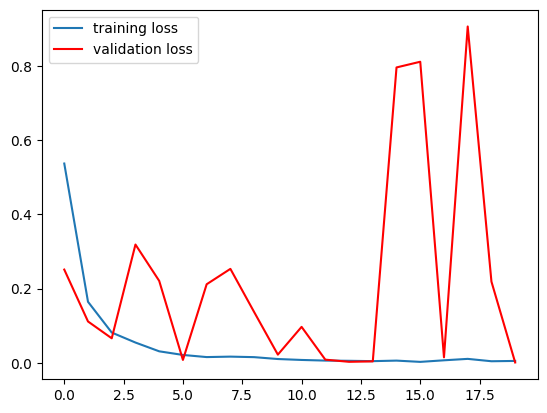

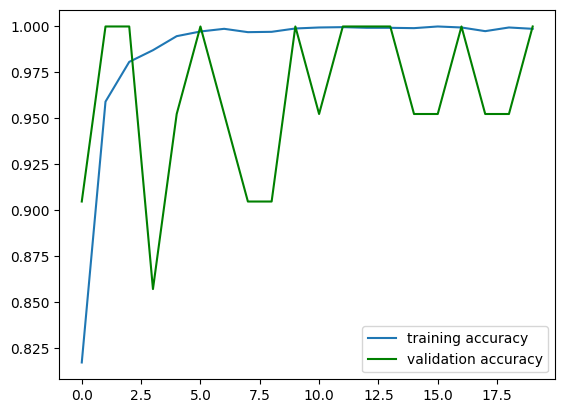

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='training loss')
plt.plot(r.history['val_loss'], label='validation loss', color='red')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='training accuracy')
plt.plot(r.history['val_accuracy'], label='validation accuracy', color='green')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')